# Assignment 4: Movie Review Analysis [50 Pt]

In this assignment, we will build a recurrent neural network to work with sequential text data, specificially, movie review data to identify the reviewer sentiment. In the process of completing this assignment, you will:
    
1. Clean and process text data for machine learning.
2. Perform tokenization of text data.
3. Understand and implement a word-level recurrent neural network.
4. Implement batching of text data using a DataLoader before training a recurrent neural network.
5. Understand how to apply pretrained models for transfer learning in natural language processing projects.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

This year we will be using an autograding script to check your model performance on a hidden test set. To do this, we need you to provide your model definition and your model weights along with your assignment submission.

Instructions on the additional files you need to submit are provided below. Please make sure to test your submitted files before submitting them, failure in loading these files may result in a grade of 0 in the results section of the assignment.

# 📑 **Autograding**

This assignment uses an autograding script to **evaluate your model performance on a hidden test set**. You must provide your model definition and model weights along with your assignment submission to ensure compatibility with the autograding system.

---

## 📁 **Required Files for Submission**

You need to submit the following **four files** in addition to the **HTML file** as previously instructed. Make sure to replace `your_name_connected_by_underscore` and `your_student_id` with your actual name and student ID, respectively:

1. **RNN Model Definition:** `A4-RNN-your_name_connected_by_underscore-your_student_id.py`
2. **RNN Model Weights:** `A4-RNN-your_name_connected_by_underscore-your_student_id.pth`
3. **BERT Model Definition:** `A4-BERT-your_name_connected_by_underscore-your_student_id.py`
4. **BERT Model Weights:** `A4-BERT-your_name_connected_by_underscore-your_student_id.pth`

---

## 🧑‍💻 **Model Definition Files (`.py`)**

### 📝 **Steps to Complete:**

1. **Copy Model Definition Code:** Copy the complete model definition code from your `A4.ipynb` notebook into the provided template files (`.py`).
2. **Complete the TODOs:** Make sure all TODOs in the files are properly completed:
   - Define your model class (`SentimentRNN` or `SentimentClassifier`).
   - Implement the `prepare_model()` function with the exact hyperparameters used during training.
   - Ensure preprocessing steps match those in your notebook.
   - Set the `EMBEDDINGS_TYPE` parameter appropriately (`'pooled'` or `'last_hidden_state'` for BERT).
3. **Command-Line Usability:** Ensure the script accepts a file path as an argument and runs from the command line as described in the file headers.

---

### 💻 **Example Command-Line Usage**

```bash
python A4-RNN-your_name_connected_by_underscore-your_student_id.py /path/to/test_dataset.csv
```
---


## 💾 **Model Weights Files (`.pth`)**

1. **Save Model Weights:** During training, save your model's best-performing weights using the `torch.save()` method.
2. **Naming Convention:** Ensure the `.pth` file names match the `.py` file names exactly, except for the file extension.
3. **Example Code for Saving Weights:**

```python
torch.save(model.state_dict(), 'A4-RNN-your_name_connected_by_underscore-your_student_id.pth')
```
---

## ✅ **Testing Your Submission: Autograder Compatibility**

You will be provided with an **"Example Test IMDB Dataset.csv"** that you can use to test your autograding file compatibility. Please follow the example command line usage to provide the test data to test the script for each of the two `.py` scripts you are submitting.

### 🧪 **How to Test:**

1. **Run the Test Notebook:** Open and run the `test_your_submitted_files.ipynb` notebook.
2. **Verify Output:** Ensure the notebook can:
   - Load your `.py` model definition files.
   - Load your `.pth` model weights files.
   - Run predictions correctly using the provided **Example Test IMDB Dataset.csv**.
3. **Debug as Needed:** If any step fails, debug the issue and retest before submission (You can ask for help on Piazza!).

---

### 🚦 **Autograder Sentinel Lines**

Make sure your scripts output predictions between the sentinel lines **exactly** as shown below:

```text
===start_output===
0
1
0
1
...
===end_output===
```

## Colab Link

Include a link to your Colab file here. If you would like the TA to look at your Colab file in case your solutions are cut off, **please make sure that your Colab file is publicly accessible at the time of submission.**

In [2]:
# TO BE COMPLETED

# http://https://colab.research.google.com/github/Fulankeee/MIE1517-Project-4/blob/main/A4.ipynb#scrollTo=rk7aDAaR2_wz

# PART A - Sentiment Analysis

In this part we will construct a world-level LSTM model for identifying positive and negative reviews. This will be done in a similar way to what was shared in the preparation code for Assignment 4.

In [3]:
# load standard modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# load special modules/libraries
import os
import warnings
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from collections import Counter
import string
import re
from tqdm  import tqdm

# load pytorch modules/libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Part 1. Data Cleaning [5 pt]

We will be using the "IMDB Movie Review Dataset" provided on the course website. Download "IMDB Dataset.csv" into your Colab workspace.

### Part (i) [1pt EXPLORATORY]

Open up the file in Python, and examine some examples of positive and negative reviews. Comment on the quality of the data and any challenges you foresee in working with these data. Pick one example of a positive review and one of a negative review to support your comments.

In [4]:
# download IMDB review data

# load dataset
df = pd.read_csv("IMDB Dataset.csv")

# process into data and labels
X = df['review'].values
y = df['sentiment'].values


In [5]:
# TO BE COMPLETED
df.head()

,review,sentiment
0,I really liked this Summerslam due to the look...,positive
1,Not many television shows appeal to quite as m...,positive
2,The film quickly gets to a major chase scene w...,negative
3,Jane Austen would definitely approve of this o...,positive
4,Expectations were somewhat high for me when I ...,negative


In [6]:
positive_review = df[df['sentiment']=='positive']
negative_review = df[df['sentiment']=='negative']

In [7]:
positive_review.iloc[0]['review']

"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended th

In [8]:
negative_review.iloc[0]['review']

"The film quickly gets to a major chase scene with ever increasing destruction. The first really bad thing is the guy hijacking Steven Seagal would have been beaten to pulp by Seagal's driving, but that probably would have ended the whole premise for the movie.<br /><br />It seems like they decided to make all kinds of changes in the movie plot, so just plan to enjoy the action, and do not expect a coherent plot. Turn any sense of logic you may have, it will reduce your chance of getting a headache.<br /><br />I does give me some hope that Steven Seagal is trying to move back towards the type of characters he portrayed in his more popular movies."

In [9]:
'''
PROVIDE YOUR ANSWER BELOW

Positive Review:
The positive review is detailed and covers multiple aspects of the event, but it also contains criticisms, such as calling the main event "terrible."
This mixed sentiment can be challenging for sentiment analysis models, as they may struggle to classify the review correctly.
The review includes subjective phrases and domain-specific references to wrestling, which require contextual understanding.

Negative Review:
The negative review highlights issues with the movie's plot and logic, but it also includes a small positive remark as well.
Since the review lacks an explicit sentiment score, it may require additional processing to quantify its negativity accurately.
Handling sarcasm, fixing formatting issues, and addressing mixed sentiment are key challenges in analyzing such data.

'''


'\nPROVIDE YOUR ANSWER BELOW\n\nPositive Review:\nThe positive review is detailed and covers multiple aspects of the event, but it also contains criticisms, such as calling the main event "terrible."\nThis mixed sentiment can be challenging for sentiment analysis models, as they may struggle to classify the review correctly.\nThe review includes subjective phrases and domain-specific references to wrestling, which require contextual understanding.\n\nNegative Review:\nThe negative review highlights issues with the movie\'s plot and logic, but it also includes a small positive remark as well.\nSince the review lacks an explicit sentiment score, it may require additional processing to quantify its negativity accurately.\nHandling sarcasm, fixing formatting issues, and addressing mixed sentiment are key challenges in analyzing such data.\n\n'

### Part (ii) [1pt EXPLORATORY]

Perform summary statistics on the dataset. What is the average character length of a review? What are the lengths of the longest and shortest reviews?

How many positive reviews and negative reviews are there. Generate a histogram to compare the average character length for positive and negative reviews. Comment on the differences in positive and negative reviews and how that may affect the model you will be using later.

Average review length: 1311.24
Longest review length: 13704
Shortest review length: 32
Average length of positive reviews: 1325.87
Average length of negative reviews: 1296.60
Number of positive reviews: 20004
Number of negative reviews: 19996


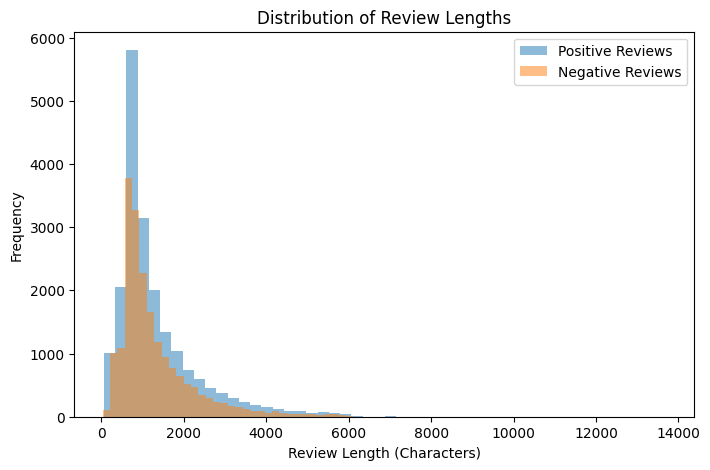

In [10]:
# TO BE COMPLETED
df['review_length'] = df['review'].str.len()
average_length = df['review_length'].mean()
longest_review = df['review_length'].max()
shortest_review = df['review_length'].min()
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']
positive_length = positive_reviews['review_length'].mean()
negative_length = negative_reviews['review_length'].mean()
num_positive = len(positive_reviews)
num_negative = len(negative_reviews)

print(f"Average review length: {average_length:.2f}")
print(f"Longest review length: {longest_review}")
print(f"Shortest review length: {shortest_review}")
print(f"Average length of positive reviews: {positive_length:.2f}")
print(f"Average length of negative reviews: {negative_length:.2f}")
print(f"Number of positive reviews: {num_positive}")
print(f"Number of negative reviews: {num_negative}")

# Histogram
plt.figure(figsize=(8, 5))
plt.hist(positive_reviews['review_length'], bins=50, alpha=0.5, label="Positive Reviews")
plt.hist(negative_reviews['review_length'], bins=50, alpha=0.5, label="Negative Reviews")
plt.xlabel("Review Length (Characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.legend()
plt.show()

In [11]:
'''
PROVIDE YOUR ANSWER BELOW

General observations:
The histogram shows that the majority of reviews length fall within a relatively short to moderate range, with a right-skewed tail extending to much longer reviews.
The average review length is 1,311 characters, indicating that most reviews provide at least a few paragraphs of detail. Nonetheless, there are outliers on the high end, with the longest review being 13,704 characters suggesting some users write extremely detailed reviews.
The shortest review in the dataset is just 32 characters, reflecting that some users provide very concise feedback. Such short reviews may lack rich sentiment cues and could pose challenges for text classification models.

Observations positive vs negative:
Positive reviews tend to be slightly longer on average (1,325.87) compared to negative reviews (1,296.60).
While this difference is not large, it suggests that people who are satisfied with a product or experience may provide more detail.
Both positive and negative reviews follow a similar distribution shape, indicating that the review length alone may not be a strong distinguishing factor between sentiment categories.
When building text classification models, it will be important to address any potential length-based bias by either normalizing input size or leveraging advanced architectures (such as transformers) that can effectively handle variable-length text without overreliance on mere character count.

'''


'\nPROVIDE YOUR ANSWER BELOW\n\nGeneral observations:\nThe histogram shows that the majority of reviews length fall within a relatively short to moderate range, with a right-skewed tail extending to much longer reviews.\nThe average review length is 1,311 characters, indicating that most reviews provide at least a few paragraphs of detail. Nonetheless, there are outliers on the high end, with the longest review being 13,704 characters suggesting some users write extremely detailed reviews.\nThe shortest review in the dataset is just 32 characters, reflecting that some users provide very concise feedback. Such short reviews may lack rich sentiment cues and could pose challenges for text classification models.\n\nObservations positive vs negative:\nPositive reviews tend to be slightly longer on average (1,325.87) compared to negative reviews (1,296.60).\nWhile this difference is not large, it suggests that people who are satisfied with a product or experience may provide more detail.\nBo

### Part (iii) [1pt EXPLORATORY]

The following helper code will be used to process the data before we can train our LSTM model. In point form comment on what processing steps are performed in the code provided below and why these steps are necessary or beneficial to training and LSTM.

In [12]:
X[0]

"I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended th

In [13]:
def preprocess_string(str1):
    # remove all non-word characters excluding number and letters
    str1= re.sub(r"[^\w\s]",'',str1)
    # remove all whitespace with no space
    str1= re.sub(r"\s",'',str1)
    # replace digits with no space
    str1= re.sub(r"\d",'',str1)
    return str1

def preprocess_sentence(sen1):
    word_list=[]
    stop_word = set(stopwords.words("english"))
    for word in sen1.lower().split():
        word = preprocess_string(word)
        if word not in stop_word and word!='':
            word_list.append(word)
    return word_list

def get_stoi(data):
    word_list=[]
    for review in data:
        word_list.extend(preprocess_sentence(review))
    corpus = Counter(word_list)
    print(corpus.get)
    # sorting on the basis of most common words
    corpus_ =sorted(corpus,key= corpus.get,reverse=True)[:1000]
    # creating a dict
    stoi =  {ch:i+1 for i,ch in enumerate(corpus_)}
    return stoi

def tokenize(data, labels, stoi):
    # tokenize
    data_encoded = []
    for review in data:
        data_encoded.append([stoi[word] for word in preprocess_sentence(review)
                             if word in stoi.keys()])

    labels_encoded = [1 if label =='positive' else 0 for label in labels]

    return np.array(data_encoded, dtype=object), np.array(labels_encoded)

def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review)!=0:
            features[ii, -len(review):] = np.array(review)[:seq_len]

    return features

In [14]:
'''
PROVIDE YOUR ANSWER BELOW

The function preprocess_string removes all non-word characters punctuation, digits, and whitespace.
This cleaning step ensures only alphanumeric content remains. It helps to reduce noise in the text and standardizes inputs before further processing.

In preprocess_sentence, the text is converted to lowercase and then split on whitespace. Lowercasing normalizes words to reduce duplication in the vocabulary.
Stopword filtering makes words like “the,” “is,” and “and removed by checking membership in the NLTK stopword set.
Eliminating stopwords can reduce the dimensionality of the data and helps the model focus on more meaningful tokens for sentiment analysis.

The function get_stoi builds a list of the most frequent words. Assigning each word an integer ID creates a numerical representation needed for model inputs.

In tokenize, each review is converted from words to integers using the stoi dictionary. This step is critical because neural networks, including LSTM models, require numerical inputs rather than raw strings.
The code also converts textual labels (“positive” or “negative”) into binary numerical labels (1 or 0). This is essential for supervised training, where the model learns to predict these numeric labels.

The function padding_ pads or truncates tokenized reviews to a fixed seq_len. Padding with zeros ensures uniform input shapes.
This step simplifies batch processing and aligns with the requirements of deep learning frameworks.

'''


'\nPROVIDE YOUR ANSWER BELOW\n\nThe function preprocess_string removes all non-word characters punctuation, digits, and whitespace.\nThis cleaning step ensures only alphanumeric content remains. It helps to reduce noise in the text and standardizes inputs before further processing.\n\nIn preprocess_sentence, the text is converted to lowercase and then split on whitespace. Lowercasing normalizes words to reduce duplication in the vocabulary.\nStopword filtering makes words like “the,” “is,” and “and removed by checking membership in the NLTK stopword set.\nEliminating stopwords can reduce the dimensionality of the data and helps the model focus on more meaningful tokens for sentiment analysis.\n\nThe function get_stoi builds a list of the most frequent words. Assigning each word an integer ID creates a numerical representation needed for model inputs.\n\nIn tokenize, each review is converted from words to integers using the stoi dictionary. This step is critical because neural networks,

### Part (iv) [1pt EXPLORATORY]

Split the dataset into `train`, `valid`, and `test`. Use a 60-20-20 split. Then apply the above processing steps to prepare your data for training.

Set the padding of the reviews to 500.

In [15]:
# TO BE COMPLETED
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=123, stratify=df['sentiment'])
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=123, stratify=temp_df['sentiment'])

# Extract reviews and labels from each split
train_reviews = train_df['review'].tolist()
train_labels  = train_df['sentiment'].tolist()

valid_reviews = valid_df['review'].tolist()
valid_labels  = valid_df['sentiment'].tolist()

test_reviews  = test_df['review'].tolist()
test_labels   = test_df['sentiment'].tolist()

# Build Vocabulary from Training Data
stoi = get_stoi(train_reviews)

train_data_encoded, train_labels_encoded = tokenize(train_reviews, train_labels, stoi)
valid_data_encoded, valid_labels_encoded = tokenize(valid_reviews, valid_labels, stoi)
test_data_encoded,  test_labels_encoded  = tokenize(test_reviews,  test_labels, stoi)

# Pad Sequences to a Length of 500
train_features = padding_(train_data_encoded, 500)
valid_features = padding_(valid_data_encoded, 500)
test_features  = padding_(test_data_encoded, 500)

<built-in method get of Counter object at 0x7c77a8d4f110>


In [16]:
train_data_encoded.shape, train_features.shape, train_labels_encoded.shape

((24000,), (24000, 500), (24000,))

In [17]:
valid_features.shape

(8000, 500)

In [18]:
test_features.shape

(8000, 500)

### Part (v) [1pt EXPLORATORY]

Create a DataLoader that will allow you to load the training and validation data in mini-batches. Then generate a dataset of batch size of 16 to verify that the DataLoader works as intended.

In [19]:
# TO BE COMPLETED
import torch
from torch.utils.data import Dataset, DataLoader
class ReviewDataset(Dataset):
  def __init__(self, features, labels):
    # Convert features and labels to Torch tensors and Ensuring they are in the correct dtype for embedding/nn usage
    self.features = torch.tensor(features, dtype=torch.long)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    # Total number of samples
    return len(self.features)

  def __getitem__(self, idx):
    # Return a single sample of data (X, y)
    return self.features[idx], self.labels[idx]

In [20]:
# Create Dataset instances for train and validation splits
train_dataset = ReviewDataset(train_features, train_labels_encoded)
valid_dataset = ReviewDataset(valid_features, valid_labels_encoded)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)

# Verify DataLoader by fetching one batch
train_batch = next(iter(train_loader))
# train_batch is a tuple (features_batch, labels_batch) of size 2
features_batch, labels_batch = train_batch

print("Batch features shape:", features_batch.shape)
print("Batch labels shape:", labels_batch.shape)

Batch features shape: torch.Size([16, 500])
Batch labels shape: torch.Size([16])


## Part 2. Model Building [2pt MODEL]

Build a recurrent neural network model, using an architecture of your choosing. Use one or more fully-connected layers to make the prediction based on your recurrent network output.

An example is provided below in `BaselineSentimentRNN`, which you can use for inspiration. However, you should build your own model.

Instead of using the RNN output value for the final token, another often used strategy is to max-pool over the entire output array. That is, instead of calling something like:

```
out, _ = self.rnn(x)
self.fc(out[:, -1, :])
```

where `self.rnn` is an `nn.RNN`, `nn.GRU`, or `nn.LSTM` module, and `self.fc` is a
fully-connected
layer, we use:

```
out, _ = self.rnn(x)
self.fc(torch.max(out, dim=1)[0])
```

This works reasonably in practice. An even better alternative is to concatenate the max-pooling and average-pooling of the RNN outputs:

```
out, _ = self.rnn(x)
out = torch.cat([torch.max(out, dim=1)[0],
                 torch.mean(out, dim=1)], dim=1)
self.fc(out)
```

We encourage you to try out all these options. The way you pool the RNN outputs is one of the "hyperparameters" that you can choose to tune later on.

In [21]:
class BaselineSentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=4, hidden_dim=4, output_dim=2):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        # Vanilla RNN returns: outputs, hidden
        outputs, hidden = self.rnn(embedded)
        # hidden.shape = (num_layers, batch_size, hidden_dim)
        out = self.fc(hidden[-1])  # take the last layer's hidden state
        return out


In [22]:
# # TO BE COMPLETED

# class SentimentRNN(nn.Module):
#     def __init__(self):
#         super(SentimentRNN, self).__init__()

#         # TO BE COMPLETED

#     def forward(self, x, hidden):

#         # TO BE COMPLETED



# model = SentimentRNN()


In [23]:
class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=128, hidden_dim=256, n_layers=2, output_dim=2, dropout=0.2):
        super(SentimentRNN, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=n_layers,
            batch_first=True, # input & output tensors are (batch, seq_len, feature)
            dropout=dropout if n_layers > 1 else 0) # dropout is only applied between stacked LSTM layers if n_layers > 1
        self.fc1 = nn.Linear(hidden_dim, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        embedded = self.embedding(x) # shape: (batch_size, seq_len, embedding_dim)
        lstm_out, (h_n, c_n) = self.lstm(embedded) # h_n has shape: (n_layers, batch_size, hidden_dim)
        hidden = h_n[-1] # last layer shape: (batch_size, hidden_dim)
        out = self.fc1(hidden)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)

        return out

## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

In [24]:
def get_accuracy(model, data, criterion, device):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """

    # TO BE COMPLETED
    model.eval()  # Set model to evaluation mode
    total_loss = 0.0
    total_err = 0.0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in data:
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          total_loss += loss.item()

          _, predicted = torch.max(outputs, 1)
          total_err += (predicted != labels).sum().item()
          correct_predictions += (predicted == labels).sum().item()
          total_samples += len(labels)

    accuracy = correct_predictions / total_samples  # Compute accuracy
    avg_loss = total_loss / len(data)  # Compute average loss

    return accuracy, avg_loss

### Part (ii) [1pt MODEL]

Train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

Using device: cpu
Max token index in batch: 1000
Using vocab_size: 1001
Epoch 1/10 | Train Loss: 0.6953 | Train Acc: 0.5084 | Val Loss: 0.6911 | Val Acc: 0.5256
Epoch 2/10 | Train Loss: 0.6860 | Train Acc: 0.5478 | Val Loss: 0.6819 | Val Acc: 0.5515
Epoch 3/10 | Train Loss: 0.6474 | Train Acc: 0.6269 | Val Loss: 0.6136 | Val Acc: 0.6819
Epoch 4/10 | Train Loss: 0.5860 | Train Acc: 0.7005 | Val Loss: 0.5763 | Val Acc: 0.7141
Epoch 5/10 | Train Loss: 0.5586 | Train Acc: 0.7242 | Val Loss: 0.5557 | Val Acc: 0.7302
Epoch 6/10 | Train Loss: 0.5338 | Train Acc: 0.7435 | Val Loss: 0.5412 | Val Acc: 0.7409
Epoch 7/10 | Train Loss: 0.5126 | Train Acc: 0.7584 | Val Loss: 0.5526 | Val Acc: 0.7349
Epoch 8/10 | Train Loss: 0.4962 | Train Acc: 0.7688 | Val Loss: 0.5071 | Val Acc: 0.7688
Epoch 9/10 | Train Loss: 0.4725 | Train Acc: 0.7867 | Val Loss: 0.5149 | Val Acc: 0.7598
Epoch 10/10 | Train Loss: 0.4682 | Train Acc: 0.7923 | Val Loss: 0.4979 | Val Acc: 0.7736


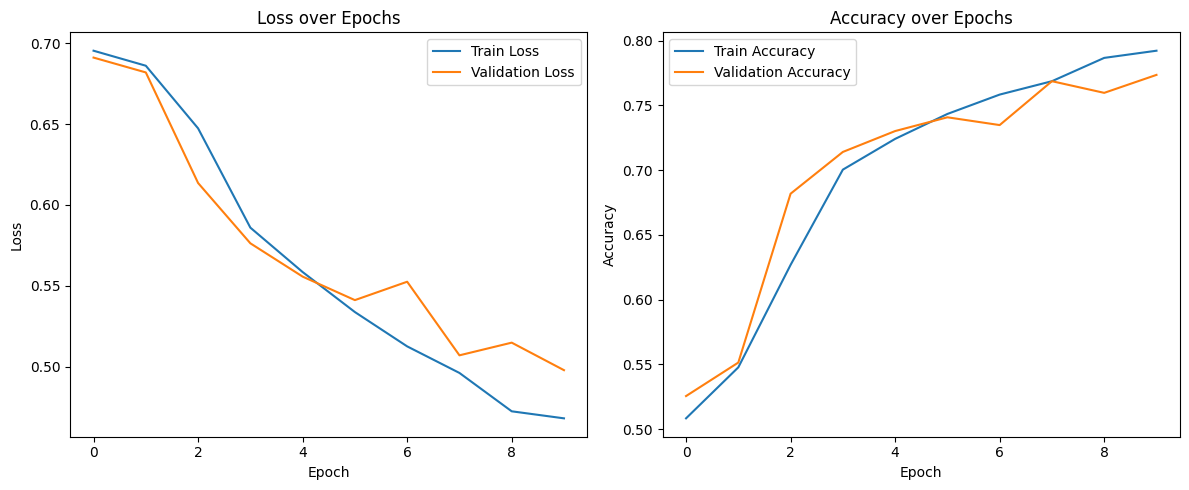

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Force the device to CPU
device = torch.device("cpu")
print(f"Using device: {device}")

# # Debug: Print the maximum token index in a batch
# for inputs, _ in train_loader:
#     max_index = inputs.max().item()
#     print("Max token index in batch:", max_index)
#     break

# # Adjust the vocabulary size to be at least max_index + 1
# vocab_size = max_index + 1  # This should be at least 997 based on your debug output
# print("Using vocab_size:", vocab_size)

# Create an instance of the BaselineSentimentRNN model
model = BaselineSentimentRNN(vocab_size=stoi(len(stoi) + 1), embedding_dim=4, hidden_dim=4, output_dim=2)
model.to(device)

# Define the loss criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Number of training epochs
num_epochs = 10

# Lists to store metrics for plotting
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

def get_accuracy(model, data, criterion, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    with torch.no_grad():
        for inputs, labels in data:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)
    avg_loss = total_loss / len(data)
    accuracy = correct_predictions / total_samples
    return accuracy, avg_loss

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()           # Zero gradients
        outputs = model(inputs)         # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                 # Backward pass
        optimizer.step()                # Update weights
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(valid_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()
plt.tight_layout()
plt.show()


In [45]:
max_index = 0
for inputs, _ in train_loader:
    batch_max = inputs.max().item()
    if batch_max > max_index:
        max_index = batch_max

print(f"Overall max token index: {max_index}")

Overall max token index: 1000


In [25]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os

# Add this before anything else
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Verify vocab size carefully:
max_index = 0
for inputs, _ in train_loader:
    batch_max = inputs.max().item()
    if batch_max > max_index:
        max_index = batch_max

print(f"Overall max token index in training set: {max_index}")

model = BaselineSentimentRNN(vocab_size=max_index + 1, embedding_dim=4, hidden_dim=4, output_dim=2)
model.to(device)


Using device: cuda
Overall max token index in training set: 1000


BaselineSentimentRNN(
  (embedding): Embedding(1001, 4)
  (rnn): RNN(4, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=2, bias=True)
)

Epoch 1/10 | Train Loss: 0.6919 | Train Acc: 0.5397 | Val Loss: 0.6867 | Val Acc: 0.5481
Epoch 2/10 | Train Loss: 0.6688 | Train Acc: 0.5864 | Val Loss: 0.6635 | Val Acc: 0.6031
Epoch 3/10 | Train Loss: 0.6094 | Train Acc: 0.6734 | Val Loss: 0.5921 | Val Acc: 0.6954
Epoch 4/10 | Train Loss: 0.5656 | Train Acc: 0.7196 | Val Loss: 0.5750 | Val Acc: 0.7156
Epoch 5/10 | Train Loss: 0.5541 | Train Acc: 0.7308 | Val Loss: 0.5733 | Val Acc: 0.7153
Epoch 6/10 | Train Loss: 0.5335 | Train Acc: 0.7473 | Val Loss: 0.5529 | Val Acc: 0.7346
Epoch 7/10 | Train Loss: 0.5202 | Train Acc: 0.7584 | Val Loss: 0.5375 | Val Acc: 0.7481
Epoch 8/10 | Train Loss: 0.5171 | Train Acc: 0.7615 | Val Loss: 0.5320 | Val Acc: 0.7491
Epoch 9/10 | Train Loss: 0.4940 | Train Acc: 0.7765 | Val Loss: 0.5193 | Val Acc: 0.7600
Epoch 10/10 | Train Loss: 0.5198 | Train Acc: 0.7525 | Val Loss: 0.5120 | Val Acc: 0.7629


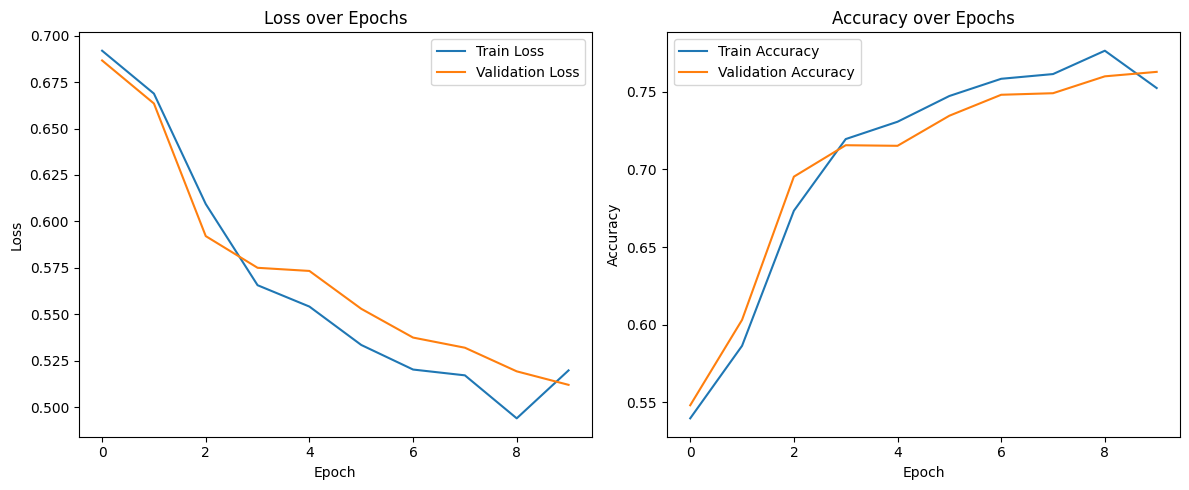

In [26]:
# Define loss criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Number of training epochs
num_epochs = 10

# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

# Define a function to compute accuracy and average loss for a dataset
def get_accuracy(model, data, criterion, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    with torch.no_grad():
        for inputs, labels in data:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)
    avg_loss = total_loss / len(data)
    accuracy = correct_predictions / total_samples
    return accuracy, avg_loss

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(valid_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os

# Add this before anything else
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Verify vocab size carefully:
max_index = 0
for inputs, _ in train_loader:
    batch_max = inputs.max().item()
    if batch_max > max_index:
        max_index = batch_max

print(f"Overall max token index in training set: {max_index}")

model = SentimentRNN(vocab_size=max_index + 1, embedding_dim=4, hidden_dim=4, output_dim=2)
model.to(device)

Using device: cuda
Overall max token index in training set: 1000


SentimentRNN(
  (embedding): Embedding(1001, 4)
  (lstm): LSTM(4, 4, num_layers=2, batch_first=True, dropout=0.2)
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

Epoch 1/10 | Train Loss: 0.6626 | Train Acc: 0.5921 | Val Loss: 0.6221 | Val Acc: 0.6548
Epoch 2/10 | Train Loss: 0.5652 | Train Acc: 0.7185 | Val Loss: 0.5237 | Val Acc: 0.7465
Epoch 3/10 | Train Loss: 0.4859 | Train Acc: 0.7760 | Val Loss: 0.4661 | Val Acc: 0.7847
Epoch 4/10 | Train Loss: 0.4323 | Train Acc: 0.8110 | Val Loss: 0.4328 | Val Acc: 0.8089
Epoch 5/10 | Train Loss: 0.3984 | Train Acc: 0.8263 | Val Loss: 0.4042 | Val Acc: 0.8199
Epoch 6/10 | Train Loss: 0.3763 | Train Acc: 0.8403 | Val Loss: 0.3851 | Val Acc: 0.8337
Epoch 7/10 | Train Loss: 0.3564 | Train Acc: 0.8520 | Val Loss: 0.3799 | Val Acc: 0.8340
Epoch 8/10 | Train Loss: 0.3482 | Train Acc: 0.8545 | Val Loss: 0.3782 | Val Acc: 0.8343
Epoch 9/10 | Train Loss: 0.3395 | Train Acc: 0.8589 | Val Loss: 0.3713 | Val Acc: 0.8404
Epoch 10/10 | Train Loss: 0.3330 | Train Acc: 0.8630 | Val Loss: 0.3614 | Val Acc: 0.8488


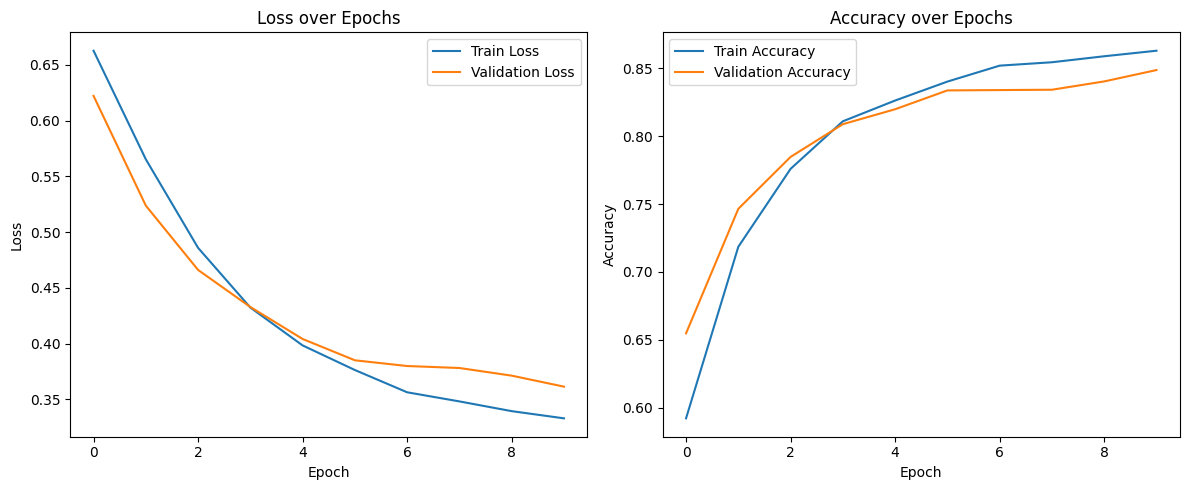

In [28]:
# Define loss criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Number of training epochs
num_epochs = 10

# Lists to store training metrics
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

# Define a function to compute accuracy and average loss for a dataset
def get_accuracy(model, data, criterion, device):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    with torch.no_grad():
        for inputs, labels in data:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)
    avg_loss = total_loss / len(data)
    accuracy = correct_predictions / total_samples
    return accuracy, avg_loss

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()            # Zero the gradients
        outputs = model(inputs)          # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                  # Backward pass
        optimizer.step()                 # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct_train / total_train

    # Evaluate on the validation set
    valid_acc, valid_loss = get_accuracy(model, valid_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {valid_loss:.4f} | Val Acc: {valid_acc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(valid_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters.
You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

## Part 4. Evaluation [10 pt]

**Important**. At this point in the assignment your test data should not have been evaluated by any of your models. The test data should be evaluated only after you have finished all the previous parts of the assignment. Once you evaluate your models on the test data you cannot change your models or else you may make hyperparameter adjustments that could lead to overfitting to the test data.

### Part (i) [3pt RESULT]

Report the final test accuracy of your model. Comment on how the result compares with accuracy obtained on the training and validation data. Are the results what you expected? Explain.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''


### Part (ii) [3pt DISCUSSION]

Look over the misclassified samples in the test data and see if you can find any patterns on where the model has difficulty with identifying the review sentiment. Provide up to 5 examples of positive and negative reviews each to support your findings.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''


### Part (iii) [2pt RESULT]

What is your model's prediction of the **probability** that
the review message provided below is a positive review?

Hint: You will need to apply the same processing on the review as was done on the the train, val, and test data sets.

In [ ]:
review = """ Man.... I wish I loved this movie more than I did. Don't get me wrong,
it's a solid action movie with jaw-dropping stunts (some of the best in the series),
but as a Mission: Impossible movie, it felt like a small step backward for the franchise.
Fallout had mind-blowing action sequences and stunt work, along with developing Ethan's
relationship with Ilsa, providing closure with Julia, showing the lengths Ethan would
go to protect those closest to him, and battling an imposing villain. Dead Reckoning:
Part One stretches the movie across two films only to seemingly showcase action
spectacle after action spectacle while sacrificing character development.
Characters I have grown to love over a decade of films felt sidelined, ignored,
or wasted. Hayley Atwell's new character chewed up most of the screen time, and
while she was fantastic, I wanted to see more of the original team. The new villain
had an inconsistent ability that confused more than intimidated. There were some
important emotional moments that I just didn't feel the weight of when I definitely
should have. Part Two might tie everything together and make me enjoy Part One
more in retrospect, but unfortunately, I left wanting more from this one. """



In [ ]:
# TO BE COMPLETED







### Part (iv) [2pt DISCUSSION]

Do you think that detecting positive and negative reviews is an easy or difficult task?

Since machine learning models are expensive to train and deploy, it is very
important to compare our models against baseline models: a simple
model that is easy to build and inexpensive to run that we can compare our
recurrent neural network model against.

Explain how you might build a simple baseline model. This baseline model
can be a simple neural network (with very few weights), a hand-written algorithm,
or any other strategy that is easy to build and test.

**Do not actually build a baseline model. Instead, provide instructions on
how to build it.**

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

# PART B - Transfer Learning

For many natural language processing tasks, it is generally not a good idea to train a very large deep neural network model from scratch due to enormous compute requirements and lack of sufficient amounts of training data. Instead, you should always try to take advantage of an existing model that performs similar tasks as the one you need to solve.

In this part of the assignment we will be using pretrained models to improve the performance on identifying positive and negative reviews. There are several pretrained models that are available to us, here we will use a pretrained BERT model that comes with the hugging face transformer library.

Provided below is sample code to get you started. For more details please visit the hugging face tutorial on using pretrained models using PyTorch: https://huggingface.co/docs/transformers/training

#### Sample Code

In [ ]:
# install relevant libraries
!pip install -qq transformers

In [ ]:
# load relevant libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

################### SUBMISSION NOTE ####################################
#  - output of this cell creates issues for converting ipynb to HTML
#  - you may want to delete this output when you are ready to submit

In [ ]:
sample_txt = 'I want to learn how to do sentiment analysis using BERT and tokenizer.'

encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
  truncation = True
)

In [ ]:
encoding['input_ids']

In [ ]:
encoding['attention_mask']

In [ ]:
hidden_states = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[0]
pooled_output = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[1]

In [ ]:
hidden_size = bert_model.config.hidden_size

print(hidden_size)
print(hidden_states.shape)
print(pooled_output.shape)


In the sample code provided we loaded a short text sequence, tokenized it using the same tokenization that was used in the pretrained BERT model, and fed the tokenized input into the BERT model to obtain the embeddings.

The model output consists of two forms of embeddings:
- **hidden_states** are the final layer of outputs that has a shape sequence_length x embeddings, much like the hidden states of a recurrent neural network
- **pooled_output** is the result of applying max pooling on the hidden states to effectively collapse the sequence dimenension and ensure the same output size for any given sequence before feeding into the classification stage

Note that we preprocess all of the data prior to training a classifier stage for sentiment analysis to help speed up the training process. This is no different from the process we applied in an earlier assignment using AlexNet and image data.

## Part 1. Data Loading [5 pt]

We will be using the same "IMDB Movie Review Dataset" that we used earlier. Reload the data and complete Part B of the assignment. You should be able to complete part B independently from Part A.

### Part (i) [1pt EXPLORATORY]

Provided below is a DataLoader for your training and test datasets so you can iterate over batches of data. Run the DataLoader to create your training, validation, and test data.

In [ ]:
from torch.utils.data import Dataset, DataLoader

class MovieReviewDataset(Dataset):
    def __init__(
        self,
        reviews,
        targets,
        tokenizer,
        max_len,
        bert_model=None,
        embed_folder='embeddings',
        precompute=True
    ):
        """
        reviews     : array/list of text data
        targets     : array/list of 'positive'/'negative' labels
        tokenizer   : BERT tokenizer
        max_len     : maximum sequence length for tokenization
        bert_model  : a BERT model for generating embeddings (if precompute=True)
        embed_folder: folder to store .pt files of precomputed embeddings
        precompute  : True -> generate & save embeddings, False -> load from disk only
        """
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.bert_model = bert_model
        self.embed_folder = embed_folder
        self.precompute = precompute

        # Create the folder if it doesn't exist
        if not os.path.exists(self.embed_folder):
            os.makedirs(self.embed_folder)

        if self.precompute and (self.bert_model is not None):
            self._precompute_embeddings()

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        """
        Returns a dictionary with:
          - 'review_text'   : original text (optional, for reference)
          - 'pooled_output' : [768]-dim embedding from BERT
          - 'last_hidden'   : [seq_len, 768] from the last hidden layer
          - 'targets'       : 0 or 1
        """
        review = str(self.reviews[idx])
        target = 1 if self.targets[idx] == 'positive' else 0

        embed_path = os.path.join(self.embed_folder, f'embedding_{idx}.pt')
        # Load precomputed embeddings
        embedding_dict = torch.load(embed_path)

        return {
            'review_text': review,
            'pooled_output': embedding_dict['pooled'],
            'last_hidden': embedding_dict['last'],
            'targets': torch.tensor(target, dtype=torch.long)
        }


    def _precompute_embeddings(self, batch_size=256, device="cuda"):
        """
        Precompute embeddings in batches rather than one by one.
        """
        # Move the model to device (CPU/GPU)
        self.bert_model = self.bert_model.to(device)
        self.bert_model.eval()

        print("Precomputing BERT embeddings (batched)...")

        # 1) Tokenize everything
        encodings = [self.tokenizer.encode_plus(
            str(review),
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        ) for review in self.reviews]
        input_ids = torch.cat([e['input_ids'] for e in encodings], dim=0)
        attention_masks = torch.cat([e['attention_mask'] for e in encodings], dim=0)

        # 2) Create a TensorDataset and DataLoader
        dataset_tensors = TensorDataset(input_ids, attention_masks)
        dataloader = DataLoader(dataset_tensors, batch_size=batch_size, shuffle=False)

        # We'll need to index back into `self.reviews` to save each sample’s .pt
        idx_offset = 0

        for batch in tqdm(dataloader, total=len(dataloader)):
            input_ids, attention_mask = [t.to(device) for t in batch]

            with torch.no_grad():
                outputs = self.bert_model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    output_hidden_states=True
                )
            # outputs.pooler_output.shape is [batch_size, hidden_dim]
            # outputs.hidden_states[-1].shape is [batch_size, seq_len, hidden_dim]

            pooled_output_batch = outputs.pooler_output.detach().cpu()
            last_hidden_batch = outputs.hidden_states[-1].detach().cpu()

            # 3) Save each sample in the batch
            for i in range(len(input_ids)):
                sample_idx = idx_offset + i
                embed_path = os.path.join(self.embed_folder, f'embedding_{sample_idx}.pt')

                # Skip if already exists (optional check)
                if os.path.isfile(embed_path):
                    continue

                embedding_dict = {
                    'pooled': pooled_output_batch[i].detach().cpu().clone(),
                    'last': last_hidden_batch[i].detach().cpu().clone()
                }

                torch.save(embedding_dict, embed_path)

            idx_offset += len(input_ids)

        print("Done precomputing embeddings.")


In [ ]:
# prepare data loaders
MAX_LEN = 400
BATCH_SIZE = 16

#training data
train_dataset = MovieReviewDataset(
    reviews=df_train['review'].values,
    targets=df_train['sentiment'].values,
    tokenizer=tokenizer,
    max_len=MAX_LEN,
    bert_model=bert_model,       # required if we want to precompute now
    embed_folder='train_embeds', # folder to save embeddings
    precompute=True              # set to True so we generate them
)

train_data_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    num_workers=4
) #modify num_works as needed


#validation data

# TO BE COMPLETED

#test data

# TO BE COMPLETED




### Part (ii) [1pt EXPLORATORY]

Use the **train_data_loader** to load one sample. What are the different attributes provided with the sample and how are they used?

In [ ]:
# TO BE COMPLETED




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iii) [1pt EXPLORATORY]

Determine the range of values for the tokens in the training data. How are the tokens obtained?

Hint: You can apply your intuition here, or do some additional research to find how the "bert-base-cased" tokenization is done.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iv) [1pt EXPLORATORY]

Generate histograms of all the token values in the training data. Repeat for the validation and test data. What are the top 5 occuring tokens in the training_dataset? What do these tokens represent?

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (v) [1pt EXPLORATORY]

Select a single sample from your training DataLoader and feed it through the **bert_model** to obtain the hidden_states and pooled_output. Briefly describe what each tensor dimension represents and what affects the size of each dimension.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

## Part 2. Model Architecture [2 pt]

### Part (i) [1pt MODEL]

Prepare a review classifier model that builds on the pooled output from the Bert model to identify positive and negative reviews.


An example is provided below in `BaselineSentimentClassifierPooled`, which you can use for inspiration. However, you should build your own model.

In [ ]:
class BaselineSentimentClassifierPooled(nn.Module):
    def __init__(self, n_classes):
        super(BaselineSentimentClassifierPooled, self).__init__()
        self.linear = nn.Linear(768, n_classes)

    def forward(self, pooled_embedding):
        """
        pooled_embedding: shape [batch_size, 768]
        """
        outputs = self.linear(pooled_embedding)
        return outputs


In [ ]:
class SentimentClassifierPooled(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifierPooled, self).__init__()
    # We don't need BERT here, since we have precomputed embeddings
    # TO BE COMPLETED

  def forward(self, pooled_embedding):
    # TO BE COMPLETED



### Part (ii) [1pt MODEL]

Construct the architecture for a review classifier model that uses the last hidden output from the Bert model to identify positive and negative reviews.

An example is provided below in `BaselineSentimentClassifierLast`, which you can use for inspiration . However, you should build your own model.


In [ ]:
class BaselineSentimentClassifierLast(nn.Module):
    def __init__(self, n_classes):
        super(BaselineSentimentClassifierLast, self).__init__()
        # Again, no BERT directly needed if using precomputed data
        self.linear = nn.Linear(768, n_classes)


    def forward(self, last_hidden):
        """
        last_hidden: shape [batch_size, seq_len, 768]
        We'll do a simple max-pool across seq_len dimension => shape [batch_size, 768]
        """
        # last_hidden has shape [B, T, 768]
        # we want max across T => shape [B, 768]
        x, _ = torch.max(last_hidden, dim=1)
        x = self.dropout(x)
        outputs = self.linear(x)
        return outputs


In [ ]:
class SentimentClassifierLast(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifierLast, self).__init__()
    # We don't need BERT here, since we have precomputed embeddings
    # TO BE COMPLETED

  def forward(self, last_hidden):

    # TO BE COMPLETED


## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

In [ ]:
def get_accuracy(model, data):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """

    # TO BE COMPLETED



### Part (ii) [1pt MODEL]

Write a function **train_model** to train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

In [ ]:
# TO BE COMPLETED




### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters. You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

## Part 4. Evaluation [10 pt]

### Part (i) [3pt RESULT]

Report the final test accuracy of your best BERT-based model. Then summarize in a pandas dataframe the accuracy obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.



In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (ii) [2pt RESULT]

Report the false positive rate and false negative rate of your model across the test set. Then summarize in a pandas dataframe the false postive and false negative rate of your model obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.

In [ ]:
# TO BE COMPLETED




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iii) [3pt DISCUSSION]
Examine some of the misclassified reviews from you best BERT and LSTM models to better identify the differences in the models. Try to provide some justification for any differences in the misclassifications observed in the models.

Is there any part of the review that you could modify to make the classifications correct? Try to make small changes to the review to see if you can make the model make the correct classification while keeping the review as close to the original as possible.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iv) [2pt DISCUSSION]
Find 5 samples of positive and negative reviews on IMDB that were posted recently and evaluate them with your best BERT and LSTM models from parts A and B. How well do they perform?

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to take on a challenging task.

In part A we constructed and trained an LSTM model to identify the sentiment in movie reviews. In Part B we used the embeddings of a BERT model pretrained on a large corpus of text to demonstrate how transfer learning can be used to improve our movie sentiment model. The BERT model is one of many language models that we could have used to implement transfer learning.

For this bonus challenge you are asked to implement a generative character-level LSTM model to produce IMDB movie reviews. Once the model is sufficiently trained you can then use its hidden states as the embedding for training a movie sentiment model. Construct your new movie sentiment analysis model and compare the performance against the model from part A and B.

There are many variants of a generative LSTM model that you can consider. As a starting point you can use the generative LSTM sample code provided in the lecture notes. Specifically, the one used to generate Shakeaspeare. More advanced versions of a generative LSTM can be found in the Universal Language Model Fine-turing for Text Classification (ULMfit) paper (https://arxiv.org/abs/1801.06146).

Tasks:

1. Create a generative character-level LSTM model trained to create IMDB reviews
2. Create a classifier using the embeddings from the generative LSTM model (from step 1) to identify positive and negative reviews.
3. Compare the performance of the model with the results in parts A and B of the assignment.
4. Upgrade the generative LSTM model using the techniques listed in the ULMfit paper (e.g., bi-directional LSTM, pretraining with wikipedia text and fine-tuning on IMDBT reviews, etc.).

Bonus marks will be provided based on the number of steps completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.


In [ ]:
# TO BE COMPLETED




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
# #!pip install nbconvert

# %%shell
# jupyter nbconvert --to html /content/A4.ipynb


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **10 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**